### 1. Using the documentation for Recursive Feature Selection, apply this process to the crime dataset to create the best model
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

Since this dataset is so small, you do not need to perform a train-test split. You can select what you are trying to predict. Be sure to explain what RFE is in the markdown

In [21]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns= None


In [22]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [23]:
import numpy as np
import seaborn as sns

In [24]:
crime_df = pd.read_csv("../week_13/crime_data.csv")

In [25]:
crime_df.head()
#print(crime_df.shape)

,X1,X2,X3,X4,X5,X6,X7
0,478,184,40,74,11,31,20
1,494,213,32,72,11,43,18
2,643,347,57,70,18,16,16
3,341,565,31,71,11,25,19
4,773,327,67,72,9,29,24


<AxesSubplot:>

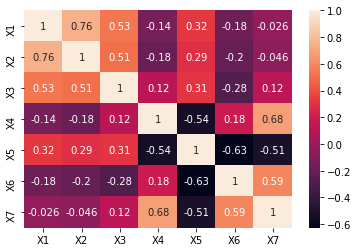

In [26]:
sns.heatmap(crime_df.corr(),annot=True)

In [27]:
X = crime_df.drop(["X5"],axis=1)
y = crime_df["X5"]

In [28]:
print(X.shape)
print(y.shape)

(50, 6)
(50,)


In [29]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=6, step=1)
selector = selector.fit(X, y)
print(selector.support_)
print(selector.ranking_)

y_pred = selector.predict(X)
y_pred

[ True  True  True  True  True  True]
[1 1 1 1 1 1]


array([11.10044025,  8.74770742, 16.73775086, 11.10023351, 16.18768349,
       10.48710223, 12.67580525, 13.81586274, 12.56889386,  8.12985805,
       15.53348868,  1.96592725, 12.93246383, 10.56630551, 11.52455808,
        8.63847367, 13.5188076 ,  7.1004491 , 13.87001087, 11.02043541,
       18.66579455, 16.3465686 , 17.70061861, 21.21996411, 15.0772407 ,
       11.12492382, 15.5113532 , 16.89951695, 18.51076848, 20.19200474,
       19.39852411, 17.2652689 , 17.73264968, 18.16302794, 18.19949416,
       18.07662957, 13.09945661, 17.86397859, 13.18894205, 15.5146877 ,
       21.9004491 , 16.08247481, 20.472618  , 20.30011871, 13.0412347 ,
       23.0994545 , 18.85990912, 15.12300555, 20.16146626, 18.31952737])

In [30]:
#Using cross validation
rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc,step=1,cv=StratifiedKFold(5),scoring='accuracy')
rfecv.fit(X,y)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=101), scoring='accuracy')

In [31]:
print(rfecv.estimator_.feature_importances_)

[0.35202621 0.32413235 0.32384144]


In [32]:
X.columns
print(rfecv.support_)
print(rfecv.ranking_)

[ True False False  True  True False]
[1 3 2 1 1 4]


In [33]:
#print(np.where(rfecv.support_ == False)[0])
rfecv.support_
X.drop(X.columns[np.where(rfecv.support_ == False)[0]],axis=1,inplace=True)

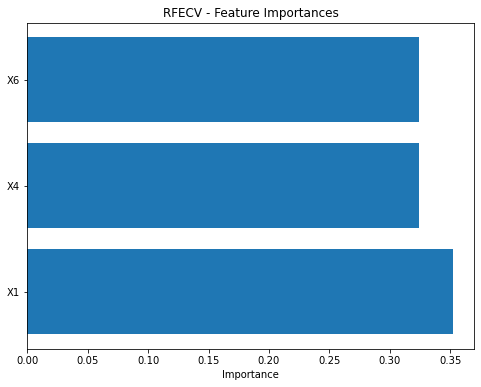

In [34]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance',ascending=False)
plt.figure(figsize=(8,6))
plt.barh(y=dset['attr'],width=dset['importance'])
plt.title("RFECV - Feature Importances")
plt.xlabel("Importance")
plt.show()

## 2. Create a function called digital_root that takes in an integer. Digital root is the recursive sum of all the digits in a number

Given n, take the sum of digits of n. If that value has more than one digit, continue reducing in this way until a single digit is produced. The input will be non negative integer.

In [35]:
from functools import reduce

def digital_root(number):
    if number >= 0:
        while number>10:
            int_list = []
            int_list = [int(i) for i in str(number)]
            #print(int_list)
            #calculate the sum
            result = reduce(lambda x,y:x+y,int_list)
            #print(result)
            number = result
    else:
        print("Number must be non-negative")
    return number

In [36]:
print(digital_root(16))
print(digital_root(942))
print(digital_root(132189))
print(digital_root(493193))
print(digital_root(-26))
print(digital_root(9))
print(digital_root(0))

7
6
6
2
Number must be non-negative
-26
9
0
